# Day 9: Smoke Basin

## First part

In [1]:
from collections import defaultdict

def load_data(filename):
    result = defaultdict(lambda: 10)
    with open(filename) as f:
        for y,line in enumerate(f.readlines()):
            for x, character in enumerate(line.strip()):
                # print(f"x = {x} y = {y} character={character}")
                result[x, y] = int(character)
    return result, (x, y)

In [2]:
def is_local_min(heights, x, y):
    v = heights[x, y]
    return all([
        heights[x-1,y] > v,
        heights[x+1,y] > v,
        heights[x,y-1] > v,
        heights[x,y+1] > v,
    ])

In [3]:
def find_local_mins(heights, size):
    max_x, max_y = size
    for x in range(max_x+1):
        for y in range(max_y+1):
            if is_local_min(heights, x, y):
                yield x, y, heights[x,y]

In [4]:
heights, size = load_data('09-sample.txt')
for x, y, value in find_local_mins(heights, size):
    print(x, y, value)

1 0 1
2 2 5
6 4 5
9 0 0


In [5]:
def find_risk_level(filename):
    heights, size = load_data(filename)
    acc = 0
    for x, y, value in find_local_mins(heights, size):
        acc += value + 1
    return acc

In [6]:
assert find_risk_level('09-sample.txt') == 15

### Solution part one

In [7]:
sol = find_risk_level('09-input.txt')
print(f"First part solution: {sol}")

First part solution: 468


## Part two

In [8]:
def neighbours(x, y):
    yield x-1, y
    yield x+1, y
    yield x, y-1
    yield x, y+1

In [9]:
def get_basin(heights, initial_x, initial_y):
    result_set = set([(initial_x, initial_y)])
    stack = [(initial_x, initial_y, heights[initial_x, initial_y]+1)]
    while stack:
        x, y, reference = stack.pop()
        for nx, ny in neighbours(x, y):
            if heights[nx, ny] >= reference and heights[nx, ny] < 9:
                stack.append((nx, ny, reference+1))
                result_set.add((nx, ny))
    return result_set


heights, size = load_data('09-sample.txt')      
assert len(get_basin(heights, 1, 0)) == 3
assert len(get_basin(heights, 9, 0)) == 9
assert len(get_basin(heights, 2, 2)) == 14
assert len(get_basin(heights, 6, 4)) == 9

In [10]:
import heapq

def find_largest_basins(filename):
    basins = []
    heights, size = load_data(filename)
    for x, y, _ in find_local_mins(heights, size):
        size = len(get_basin(heights, x, y))
        heapq.heappush(basins, (size, x, y))
    return basins

def solution2(filename, n=3):
    basins = find_largest_basins(filename)
    acc = 1
    for (size, x, y) in heapq.nlargest(n, basins):
        acc *= size
    return acc

Find the three largest basins and multiply their sizes together. In the above example, this is 9 * 14 * 9 = **1134**.

In [11]:
assert solution2('09-sample.txt') == 1134

### Solution part 2

In [12]:
sol = solution2('09-input.txt')
print(f"Solution for part two: {sol}")

Solution for part two: 1280496


## Extra

In [13]:
def dot(img, x, y, color):
    img.putpixel((x*2, y*2), color)
    img.putpixel((x*2+1, y*2), color)
    img.putpixel((x*2, y*2+1), color)
    img.putpixel((x*2+1, y*2+1), color)

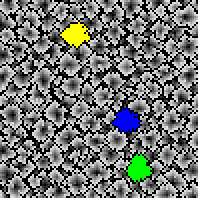

In [14]:
import itertools
from PIL import Image

basins = heapq.nlargest(3, find_largest_basins('09-input.txt'))
heights, (max_x, max_y) = load_data('09-input.txt')
img = Image.new('RGBA', (max_x*2, max_y*2))
for y in range(max_x):
    for x in range(max_y):
        level = heights[x, y] * 28 % 252
        dot(img, x, y, (level, level, level))

Color = itertools.cycle([
    (255, 255, 0),
    (0, 255, 0),
    (0, 0, 255),
])

for size, xx, yy in basins:
    color = next(Color)
    for x, y in get_basin(heights, xx, yy):
        dot(img, x, y, color)
img.save('09-map.png')
img

In [15]:
from IPython.core.display import HTML

heights, size = load_data('09-input.txt')

xx, yy = 63, 60
basins = get_basin(heights, xx, yy)
buff = ["<table>"]
for y in range(yy-7, yy+7):
    buff.append("<tr>")
    for x in range(xx-8, xx+8):
        if (x, y) in basins:
            if x == xx and y == yy:
                buff.append(f'<th style="background: red;"><b>{heights[x, y]}</b></th>')
            else:
                buff.append(f'<td style="background: yellow;">{heights[x, y]}</td>')
        else:
            if heights[x, y] == 9:
                buff.append(f'<td style="background: silver; color:gray">{heights[x, y]}</td>')
            else:
                buff.append(f'<td style="color:gray">{heights[x, y]}</td>')
    buff.append("</tr>")
buff.append("</table>")        
HTML(''.join(buff))

9,8,7,6,7,9,9,3,9,8,7,5,4,3,2,3
9,9,8,7,8,9,8,9,8,9,5,4,3,2,1,2
8,9,9,8,9,9,7,6,7,8,9,9,4,3,4,3
7,8,9,9,8,7,8,5,6,7,9,8,9,9,5,6
6,7,9,8,7,6,5,4,3,4,5,6,7,8,9,9
5,6,7,9,8,5,5,3,2,3,4,5,9,9,9,8
4,5,9,8,7,4,3,2,1,2,4,8,7,8,9,7
3,9,8,7,6,5,2,1,0,1,2,3,6,7,8,9
9,8,7,6,5,4,3,2,1,2,3,4,5,6,9,5
5,9,8,7,6,5,4,3,2,3,4,5,6,7,8,9
4,5,9,9,7,6,5,7,6,5,5,6,7,8,9,5
